In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Loading**
This section loads the Titanic dataset into pandas DataFrames for analysis.

In [15]:
# Load the Titanic dataset from CSV file
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Initial Data Exploration**
explores the dataset structure, data types, and missing values.

In [17]:
# Display dataset information such as column names, types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [19]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
df.duplicated().sum()

0

# **Data Cleaning**

In [22]:
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

In [23]:
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.')
df['Title'] = df['Title'].replace(['Mlle','Ms'],'Miss').replace('Mme','Mrs')

In [24]:
title_age_median = df.groupby('Title')['Age'].median()
df['Age'] = df.apply(lambda row: title_age_median[row['Title']] if pd.isna(row['Age']) else row['Age'], axis=1)

In [25]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [26]:
df['Has_Cabin'] = df['Cabin'].notna().astype(int)
df['CabinDeck'] = df['Cabin'].dropna().str[0]
df['CabinDeck'] = df['CabinDeck'].fillna('M') 

# **Feature Engineering**
This section creates new features from the existing columns to improve predictive analysis.

In [28]:
# Create a new feature: FamilySize = SibSp + Parch + 1
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
# Create a new feature: FamilySize = SibSp + Parch + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [29]:
# Define age bins and labels
bins = [0, 1, 12, 18, 35, 60, 80]
labels = ['Baby', 'Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

# Create AgeGroup column
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Has_Cabin,CabinDeck,FamilySize,IsAlone,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,M,2,0,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,C,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,M,1,1,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,C,2,0,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,M,1,1,Adult


# **Data Cleaning**
Here we handle missing values, drop unnecessary columns, and clean the dataset.

In [32]:
# Drop Columns
# Drop unnecessary columns or rows with missing values
df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)

In [33]:
# Create a summary DataFrame
summary = pd.DataFrame({
    'Data type': df.dtypes,
    'Sample Values': df.apply(lambda col: col.dropna().unique()[:3])
})

# Display the summary
summary

,Data type,Sample Values
Survived,int64,"[0, 1]"
Pclass,category,"[3, 1, 2] Categories (3, int64): [1, 2, 3]"
Sex,category,"['male', 'female'] Categories (2, object): ['f..."
Age,float64,"[22.0, 38.0, 26.0]"
SibSp,int64,"[1, 0, 3]"
Parch,int64,"[0, 1, 2]"
Fare,float64,"[7.25, 71.2833, 7.925]"
Embarked,category,"['S', 'C', 'Q'] Categories (3, object): ['C', ..."
Title,object,"[Mr, Mrs, Miss]"
Has_Cabin,int32,"[0, 1]"


### Summary statistics and Group-based insights

In [35]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')

In [36]:
# survival rate by sex
survival_by_sex = df.groupby('Sex')['Survived'].agg(['mean','count']).rename(columns={'mean':'survival_rate'})
print(survival_by_sex)

        survival_rate  count
Sex                         
female       0.742038    314
male         0.188908    577


In [37]:
# survival rate by class
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print(survival_by_class)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [38]:
# survival by Embarked
survival_by_embarked = df.groupby('Embarked')['Survived'].agg(['mean','count'])

# survival by FamilySize
# Create a new feature: FamilySize = SibSp + Parch + 1
survival_by_family = df.groupby('FamilySize')['Survived'].mean()

In [39]:
# pivot (multi-dim insight)
pivot = df.pivot_table(index='Pclass', columns='Sex', values='Survived', aggfunc='mean')
print(pivot)

Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


# **Data Visualization - Bar Plots**

Text(0.5, 1.0, 'Survivors count by Sex')

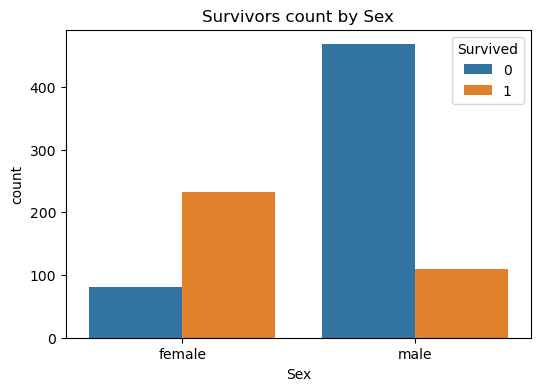

In [42]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survivors count by Sex')

Text(0.5, 1.0, 'Survival rate by Pclass')

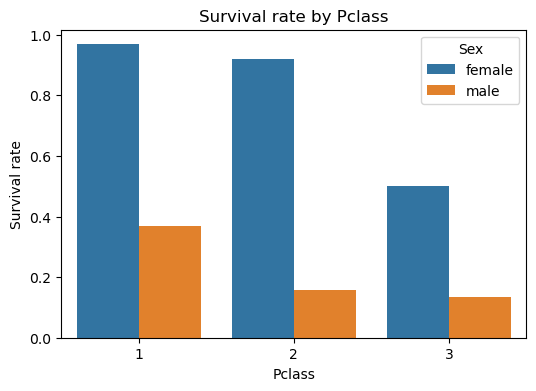

In [43]:
plt.figure(figsize=(6,4))
# Plot survival rates by a specific feature using a barplot
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex', ci=None)
plt.ylabel('Survival rate')
plt.title('Survival rate by Pclass')

Text(0.5, 1.0, 'Age distribution by Survival')

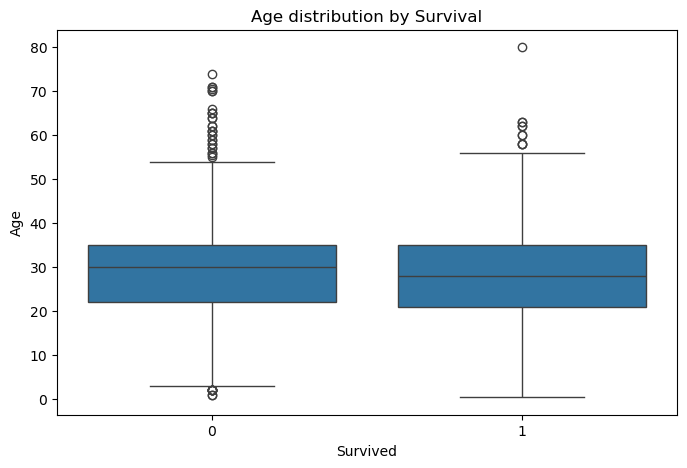

In [44]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Survived', y='Age')
plt.title('Age distribution by Survival')

# **Data Visualization - Heatmaps**

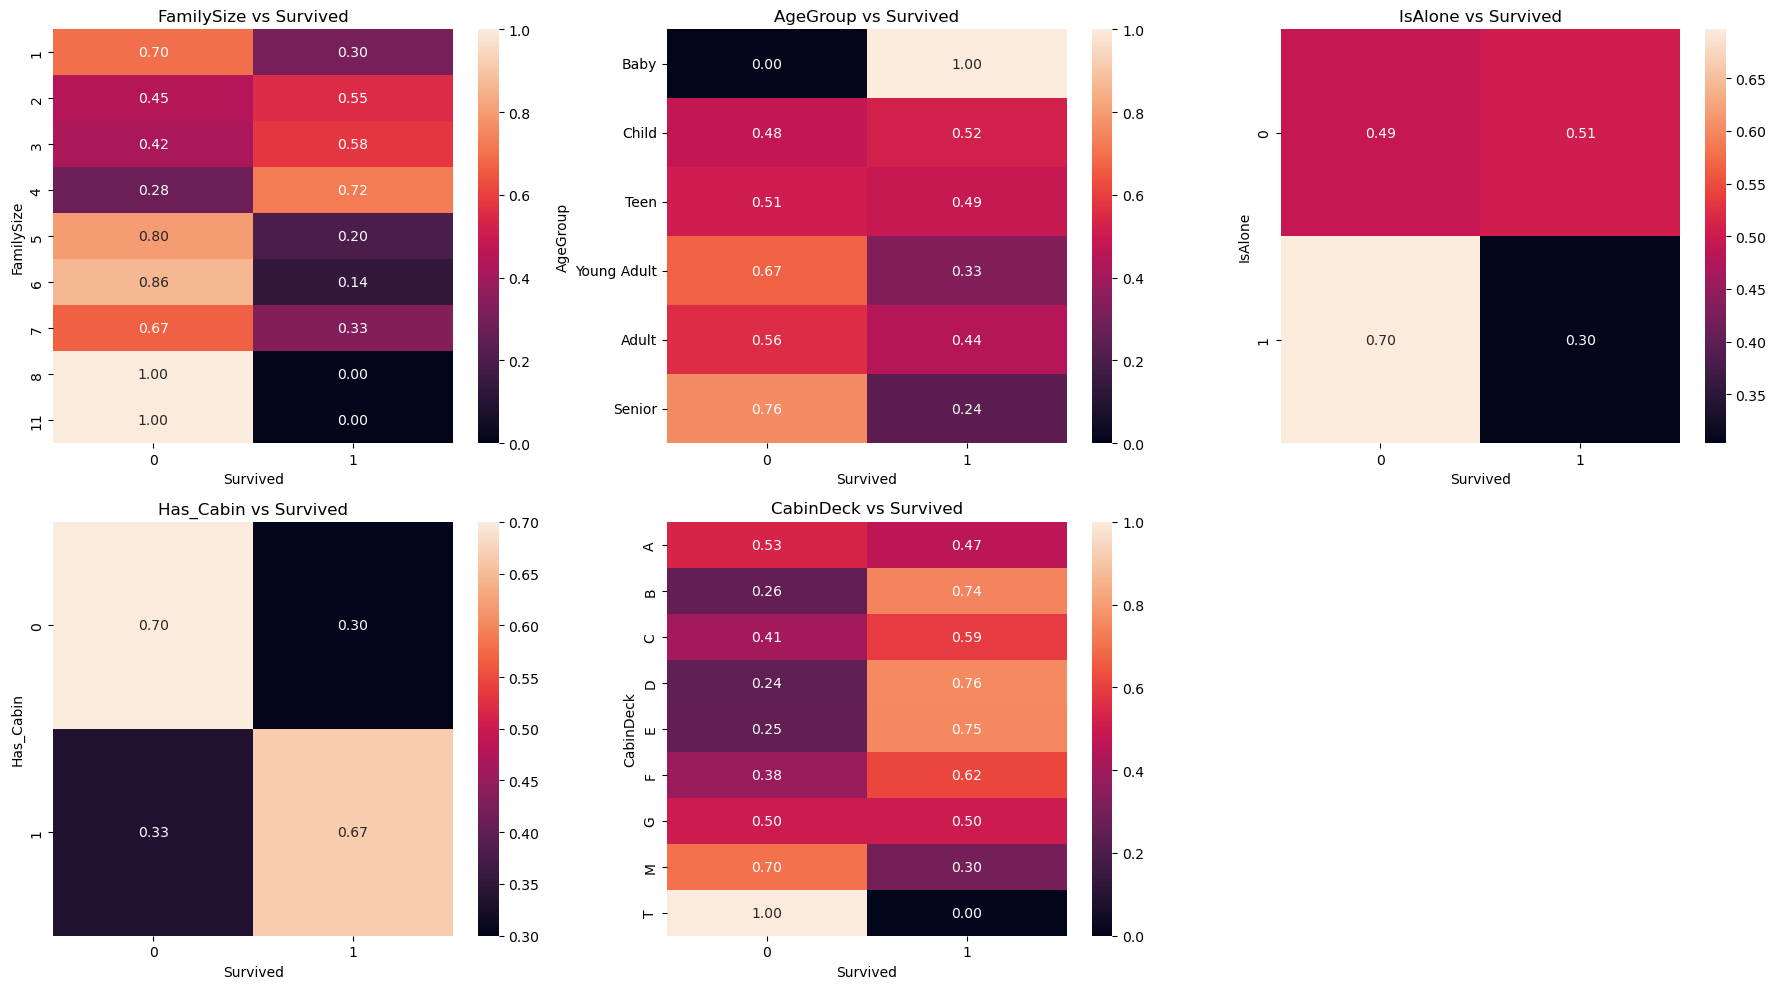

In [46]:
# Import necessary libraries
import math

def bin_num(s):
    try:
        return pd.qcut(s, q=3, duplicates='drop')
    except:
        return pd.cut(s, bins=3)

def plot_survival_heatmaps(df, cols, numeric=False):
    n = len(cols)
    rows = math.ceil(n / 3)
    fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        ax = axes[i]
        x = bin_num(df[col]) if numeric else df[col]
        if x.nunique() > 30:
            ax.axis('off')
            continue

        survival_table = pd.crosstab(x, df['Survived'], normalize='index')
# Create a heatmap showing survival rate distribution across a feature
        sns.heatmap(survival_table, annot=True, fmt='.2f', ax=ax)
        ax.set_title(f'{col} vs Survived')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Create a new feature: FamilySize = SibSp + Parch + 1
custom_cols = ['FamilySize', 'AgeGroup', 'IsAlone', 'Has_Cabin', 'CabinDeck']

plot_survival_heatmaps(df, custom_cols) 

Text(0.5, 1.0, 'Survival rate by Pclass and Sex')

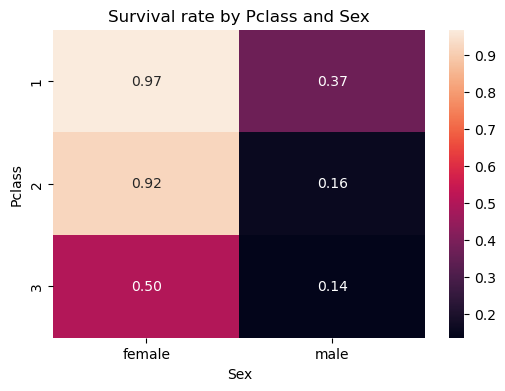

In [47]:
plt.figure(figsize=(6,4))
# Create a heatmap showing survival rate distribution across a feature
sns.heatmap(pivot, annot=True, fmt=".2f")
plt.title('Survival rate by Pclass and Sex')

Text(0.5, 1.0, 'Numeric features correlation')

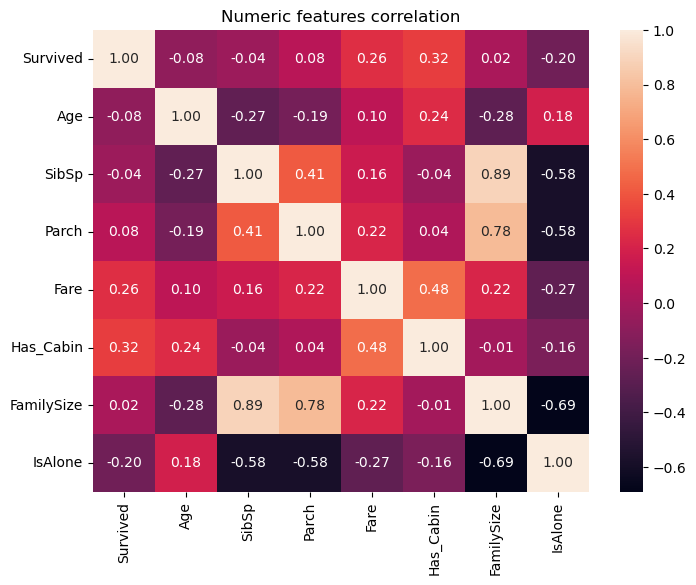

In [48]:
plt.figure(figsize=(8,6))
# Create a heatmap showing survival rate distribution across a feature
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, fmt=".2f")
plt.title('Numeric features correlation')